## Baseline checks

Just checking everything works as it should

In [161]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import json
import os
# set cwd
os.chdir("/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/analysis")

centralized_training_loss = glob.glob(f"../results/**/centralized_training/**/loss_per_epoch.csv", recursive=True)
centralized_training_loss = centralized_training_loss[0]
centralized_training_loss


'../results/periodic/centralized_training/300_epochs/lr_0.01-batchsize_32_clipping_False/loss_per_epoch.csv'

In [162]:
data_fedavg_df

data_fedavg_df_cen

,round,centralized_loss,centralized_accuracy
0,0,8498.811593,1.717061
1,1,2683.699707,0.540761
2,2,2442.069336,0.489545
3,3,2400.953299,0.481155
4,4,2376.484096,0.475941
5,5,2369.566441,0.474678
6,6,2351.550991,0.470833
7,7,2336.352400,0.467634
8,8,2319.247454,0.464190
9,9,2277.102225,0.455943


## Use the produced model to plot the output

In [163]:
# Now load the federated learning loss
fedode = f"../results/periodic/federated_training/FedODE/50_rounds/rep_1-alpha_0.5-lr_0.01-batchsize_32_clipping_False_lrdecay_0.01/federated_outputs/results.json"
fedavg = f"../results/periodic/federated_training/FedAvg/50_rounds/rep_1-alpha_0.5-lr_0.01-batchsize_32_clipping_False_lrdecay_0.01/federated_outputs/results.json"

In [164]:
data_fedavg

{'centralized_evaluate': [{'round': 0,
   'centralized_loss': 8498.811593191964,
   'centralized_accuracy': 1.7170612982341222},
  {'round': 1,
   'centralized_loss': 2683.69970703125,
   'centralized_accuracy': 0.5407607129641941},
  {'round': 2,
   'centralized_loss': 2442.0693359375,
   'centralized_accuracy': 0.4895445874759129},
  {'round': 3,
   'centralized_loss': 2400.953299386161,
   'centralized_accuracy': 0.48115464193480356},
  {'round': 4,
   'centralized_loss': 2376.4840959821427,
   'centralized_accuracy': 0.4759406660284315},
  {'round': 5,
   'centralized_loss': 2369.5664411272323,
   'centralized_accuracy': 0.47467794588633944},
  {'round': 6,
   'centralized_loss': 2351.5509905133927,
   'centralized_accuracy': 0.47083316104752676},
  {'round': 7,
   'centralized_loss': 2336.3523995535716,
   'centralized_accuracy': 0.46763449907302856},
  {'round': 8,
   'centralized_loss': 2319.2474539620534,
   'centralized_accuracy': 0.4641899083341871},
  {'round': 9,
   'centra

In [165]:
# plot loss of both fedode and fedavg

def parse_json_loss(file):
    with open(file, 'r') as f:
        data = json.load(f)

    # Get centralized 
    cen = data['centralized_evaluate']
    cen = pd.DataFrame(cen)
    cen["eval_type"] = "centralized"
    # if column *_loss* exists, rename it to *loss*
    cen = cen.rename(columns={col: "loss" for col in cen.columns if "loss" in col})
    cen = cen.rename(columns={col: "accuracy" for col in cen.columns if "accuracy" in col})

    # Get federated
    fed = data['federated_evaluate']
    fed = pd.DataFrame(fed)
    fed["eval_type"] = "federated"
    # if column *_loss* exists, rename it to *loss*
    fed = fed.rename(columns={col: "loss" for col in fed.columns if "loss" in col})
    fed = fed.rename(columns={col: "accuracy" for col in fed.columns if "accuracy" in col})

    # Merge 
    df = pd.concat([cen, fed], axis=0)
    return df


In [166]:
df_avg = parse_json_loss(fedavg)
df_avg["agg_type"] = "FedAvg"
df_ode = parse_json_loss(fedode)
df_ode["agg_type"] = "FedODE"
df = pd.concat([df_avg, df_ode], axis=0)
df

,round,loss,accuracy,eval_type,agg_type
0,0,7361.579799,1.499292,centralized,FedAvg
1,1,2658.079311,0.534611,centralized,FedAvg
2,2,2504.433873,0.501784,centralized,FedAvg
3,3,2419.217878,0.484442,centralized,FedAvg
4,4,2392.800084,0.479491,centralized,FedAvg
...,...,...,...,...,...
45,46,571.273478,0.115831,federated,FedODE
46,47,357.189107,0.073520,federated,FedODE
47,48,506.499222,0.104827,federated,FedODE
48,49,481.264074,0.098956,federated,FedODE


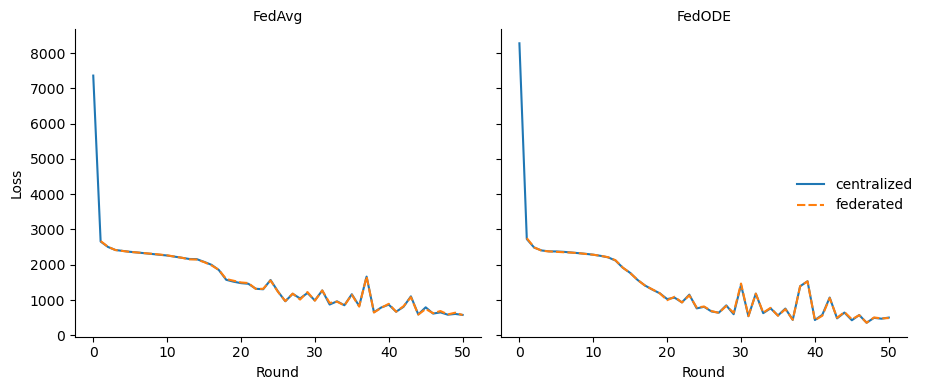

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called `df`
g = sns.FacetGrid(df, col="agg_type", height=4, sharey=True)

g.map_dataframe(
    sns.lineplot,
    x="round",
    y="loss",   # or "accuracy" for that metric
    hue="eval_type",
    style="eval_type"
    
)

g.set_axis_labels("Round", "Loss")
g.add_legend()
g.set_titles(col_template="{col_name}")

plt.tight_layout()
plt.show()



In [175]:
# Extract first 10 rounds, fedavg and fedode
df_avg[df_avg["round"] == 49]

,round,loss,accuracy,eval_type,agg_type
49,49,606.962847,0.123575,centralized,FedAvg
48,49,642.292603,0.130260,federated,FedAvg


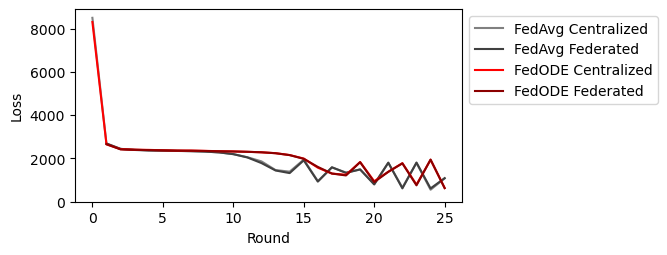

In [169]:
# now plot the data
plt.figure(figsize=(5, 2.5))
plt.plot(df_fedavg_fedode_cen['round'], df_fedavg_fedode_cen['centralized_loss_x'], label='FedAvg Centralized', color='grey')  
plt.plot(df_fedavg_fedode['round'], df_fedavg_fedode['federated_evaluate_loss_x'], label='FedAvg Federated', color='#404040')  

plt.plot(df_fedavg_fedode_cen['round'], df_fedavg_fedode_cen['centralized_loss_y'], label='FedODE Centralized', color='red')

# now plot the data
plt.plot(df_fedavg_fedode['round'], df_fedavg_fedode['federated_evaluate_loss_y'], label='FedODE Federated', color='darkred')
# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_fedavg_fedode['round'])
# make the x ticks every 5 rounds
plt.xticks(np.arange(0, 26, 5))
# add x and y labels
plt.xlabel('Round')
plt.ylabel('Loss')
plt.show()

In [170]:
df_fedavg_fedode

,round,federated_evaluate_loss_x,federated_evaluate_accuracy_x,federated_evaluate_loss_y,federated_evaluate_accuracy_y
0,1,2691.694417,0.541500,2662.180745,0.536023
1,2,2441.731771,0.489659,2417.955322,0.484655
2,3,2391.901693,0.479209,2398.372640,0.480670
3,4,2367.812500,0.474084,2385.738363,0.477827
4,5,2355.910522,0.471636,2373.194661,0.475508
5,6,2347.190592,0.469886,2359.325317,0.472226
6,7,2337.328532,0.467889,2356.841187,0.472145
7,8,2316.563436,0.464138,2344.542725,0.469695
8,9,2279.870239,0.456502,2332.827718,0.466876
9,10,2199.491943,0.440349,2321.582438,0.464909


In [171]:
data_fedavg


{'centralized_evaluate': [{'round': 0,
   'centralized_loss': 8498.811593191964,
   'centralized_accuracy': 1.7170612982341222},
  {'round': 1,
   'centralized_loss': 2683.69970703125,
   'centralized_accuracy': 0.5407607129641941},
  {'round': 2,
   'centralized_loss': 2442.0693359375,
   'centralized_accuracy': 0.4895445874759129},
  {'round': 3,
   'centralized_loss': 2400.953299386161,
   'centralized_accuracy': 0.48115464193480356},
  {'round': 4,
   'centralized_loss': 2376.4840959821427,
   'centralized_accuracy': 0.4759406660284315},
  {'round': 5,
   'centralized_loss': 2369.5664411272323,
   'centralized_accuracy': 0.47467794588633944},
  {'round': 6,
   'centralized_loss': 2351.5509905133927,
   'centralized_accuracy': 0.47083316104752676},
  {'round': 7,
   'centralized_loss': 2336.3523995535716,
   'centralized_accuracy': 0.46763449907302856},
  {'round': 8,
   'centralized_loss': 2319.2474539620534,
   'centralized_accuracy': 0.4641899083341871},
  {'round': 9,
   'centra

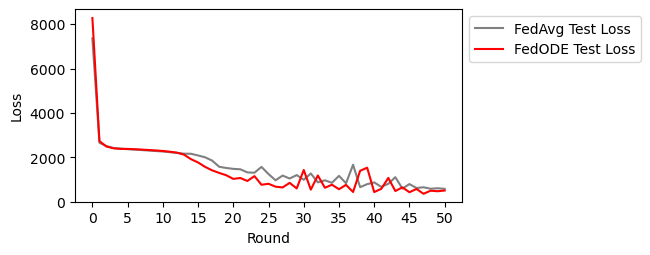

In [172]:
# plot loss of both fedode and fedavg
with open(fedavg, 'r') as f:
    data_fedavg = json.load(f)
with open(fedode, 'r') as f:
    data_fedode = json.load(f)

data_fedavg_df_cen = pd.DataFrame(data_fedavg['centralized_evaluate'])
data_fedode_df_cen = pd.DataFrame(data_fedode['centralized_evaluate'])

# join the two dataframes on the round
data_fedavg_df_cen['round'] = data_fedavg_df_cen['round'].astype(int)
data_fedode_df_cen['round'] = data_fedode_df_cen['round'].astype(int)
df_fedavg_fedode_cen = pd.merge(data_fedavg_df_cen, data_fedode_df_cen, on='round')
# now plot the data
plt.figure(figsize=(5, 2.5))
plt.plot(df_fedavg_fedode_cen['round'], df_fedavg_fedode_cen['centralized_loss_x'], label='FedAvg Test Loss', color='grey')  
plt.plot(df_fedavg_fedode_cen['round'], df_fedavg_fedode_cen['centralized_loss_y'], label='FedODE Test Loss', color='red')
# add legend on the outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(bottom=0)
# x axis is discrete
plt.xticks(df_fedavg_fedode_cen['round'])
# make the x ticks every 5 rounds
plt.xticks(np.arange(0, 51, 5))
# add x and y labels
plt.xlabel('Round')
plt.ylabel('Loss')
plt.show()

In [173]:
def get_df(field = "nodesolve"):
    cns = [0, 1]
    df = pd.DataFrame()
    for cn in cns:
        results_path = f"../results_ll/periodic/federated_training/FedODE/50_rounds/rep_1-alpha_0.5-lr_0.01-batchsize_32_clipping_False/federated_outputs/results_{cn}.json"
        # path to the results file
        with open(results_path, "r") as f:
            data = json.load(f)
        for entry in data["client_train"]:
                round_num = entry["round"]
                for itr, loss_val in enumerate(entry[field]):
                    df = pd.concat([df, pd.DataFrame([{
                        "client": cn,
                        "round": round_num,
                        "itr": itr,
                        field: loss_val
                    }])], ignore_index=True)
    
    df["itr"] = df["itr"] + 1
    max_itr = df["itr"].max()
    df["itr"] = df["itr"] + (max_itr* df["round"])
    # keep only itr 1:3
    return df

    

# keep only itr 1:3
df = get_df("nodesolve")

FileNotFoundError: [Errno 2] No such file or directory: '../results_ll/periodic/federated_training/FedODE/50_rounds/rep_1-alpha_0.5-lr_0.01-batchsize_32_clipping_False/federated_outputs/results_0.json'

In [ ]:
df

,client,round,itr,nodesolve
0,0,0,1,20
1,0,0,2,26
2,0,0,3,26
3,0,0,4,32
4,0,0,5,32
...,...,...,...,...
2995,1,49,1496,356
2996,1,49,1497,338
2997,1,49,1498,338
2998,1,49,1499,350


/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_17512/4103255506.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="itr", y="nodesolve", palette="Set1")
/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_17512/4103255506.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Client")
/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_17512/4103255506.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Client", bbox_to_anchor=(1.05, 1), loc='upper left')


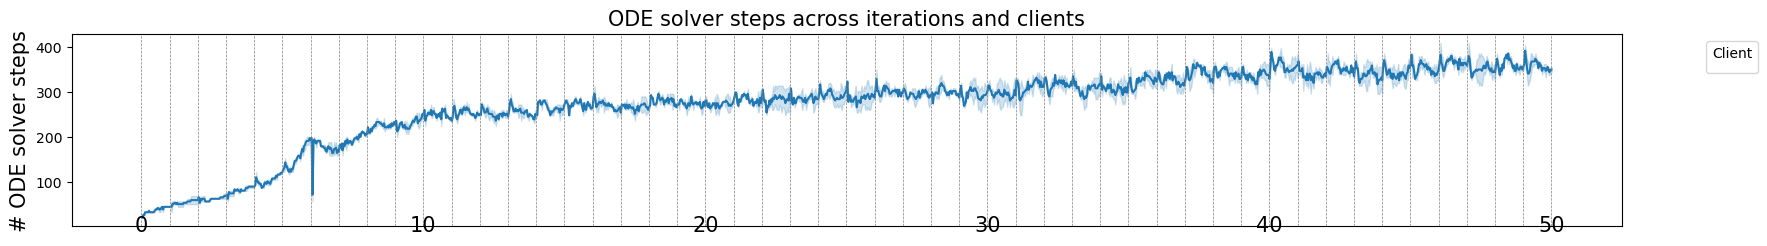

In [ ]:
# Plot Loss for making sure, y loss, x round, color client
plt.figure(figsize=(20, 2.5))
sns.lineplot(data=df, x="itr", y="nodesolve", palette="Set1")

plt.legend(title="Client")
plt.legend(title="Client", bbox_to_anchor=(1.05, 1), loc='upper left')
# x integer not float ticks
plt.title("ODE solver steps across iterations and clients", fontsize  =15)
max_itr = df["itr"].max() // (df["round"].max()+1)
# plot rounds as vertical lines
for i in range(0, df["round"].max()+2):
    plt.axvline(x=(i*max_itr), color='gray', linestyle='--', linewidth=0.5)
    # add ticks with the round number
    if i % 10 == 0:
        plt.text((i*max_itr), -21, str(i), fontsize=15, ha='center', va='bottom')

    # remove the ticks
    plt.xticks()
# remove the ticks
plt.xticks([])

# y label 
plt.ylabel("# ODE solver steps", fontsize=15)

plt.xlabel("")
# x label
plt.show()